# NLP task

### *  transformer api를 사용하여 아래와 같은 테스크를 처리할수 있음
---
- feature-extraction(텍스트의 벡터 표현을 얻습니다)
  - 텍스트 분류: 텍스트의 종류를 분류하는 작업
  - 객체 탐지: 텍스트에서 특정 객체를 탐지하는 작업
  - 관계 추론: 텍스트에서 두 개 이상의 단어 또는 문장 사이의 관계를 추론하는 작업
  - 질의 응답: 사용자의 질의에 답변하는 작업
- fill-mask
- ner(명명된 엔터티 인식)
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification

## sentiment-analysis

In [1]:
from transformers import pipeline

In [10]:
classifier = pipeline("sentiment-analysis")
classifier("안녕하세요")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9333857893943787}]

## text-generation

In [4]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to use any of the existing techniques, and then be sure to provide a course guide that you cannot use'},
 {'generated_text': 'In this course, we will teach you how to be a good communicator.\n\n\nHow to get started\nThe first step is to become'}]

## Mask filling

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

# Transformer의 역사 (예시로 간략하게)
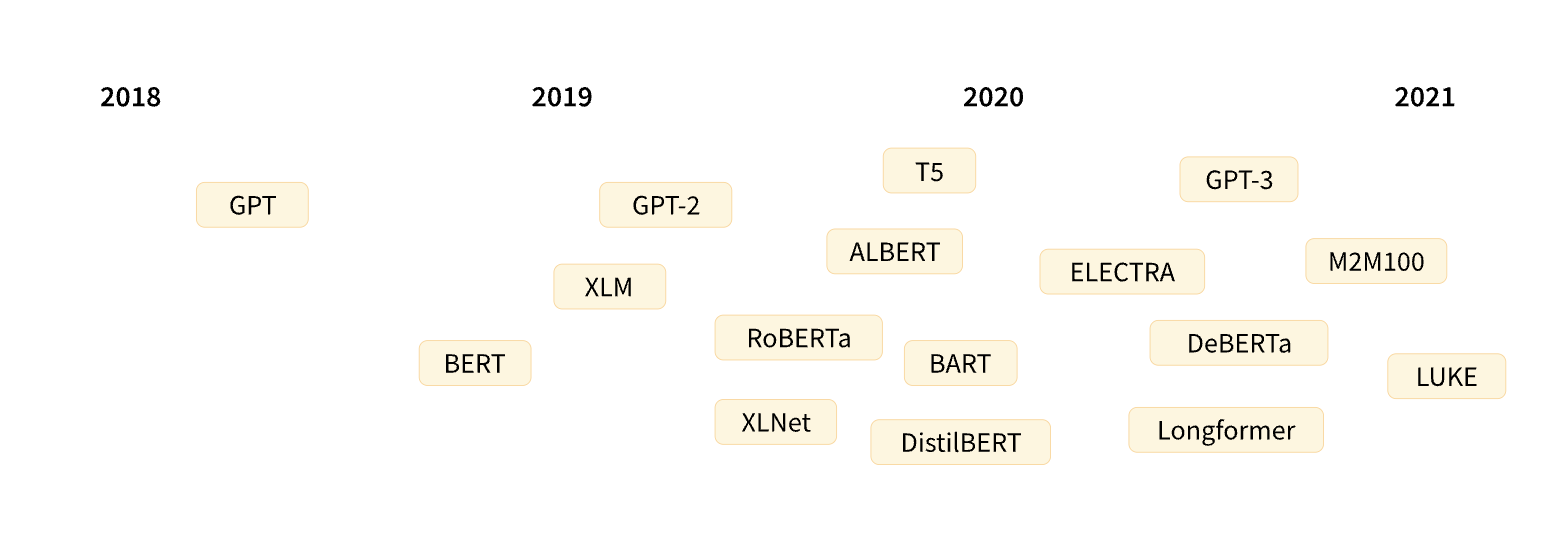

# transformer 구조
- 인코더 전용 모델 : 문장 분류, 명명된 엔터티 인식 등 입력에 대한 이해가 필요한 작업에 적합합니다.
- 디코더 전용 모델 : 텍스트 생성과 같은 생성 작업에 적합합니다.
- 인코더-디코더 모델 또는 시퀀스-시퀀스 모델 : 번역 또는 요약과 같이 입력이 필요한 생성 작업에 적합합니다.
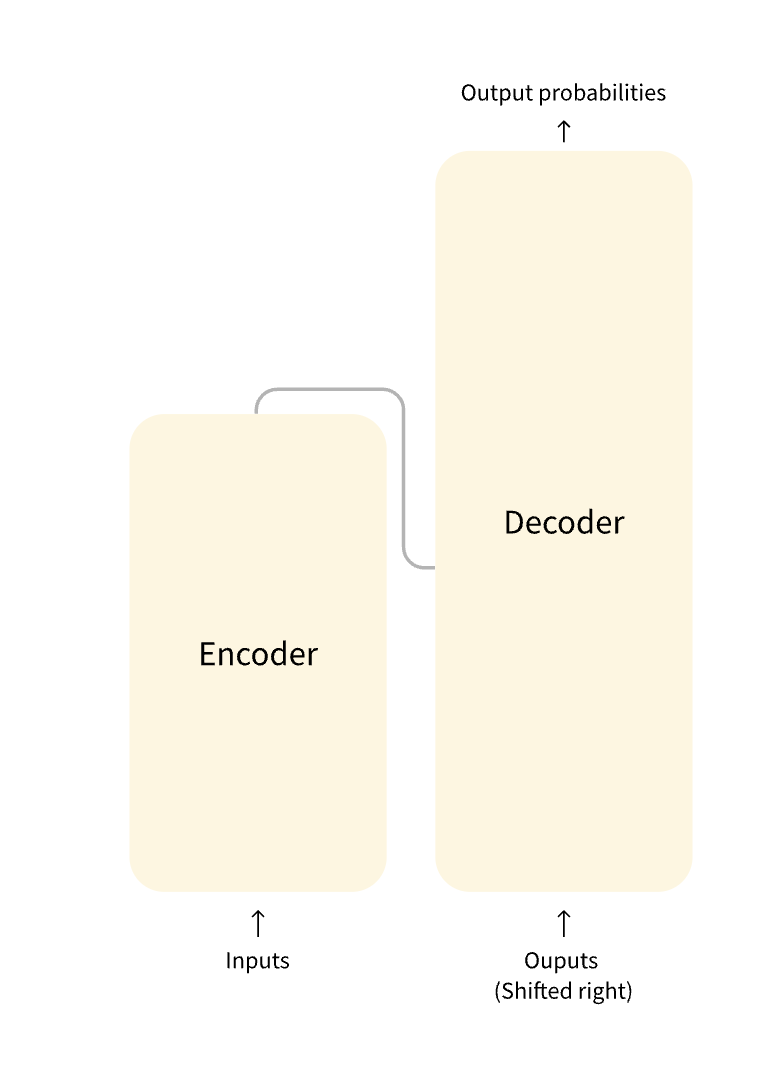

# 아키텍쳐, 체크포인트, 모델
- 아키텍처 : 이는 모델의 뼈대입니다. 즉, 각 레이어의 정의와 모델 내에서 발생하는 각 작업입니다.
- 체크포인트 : 주어진 아키텍처에 로드될 가중치입니다.
- 모델 : 이는 "아키텍처" 또는 "체크포인트"만큼 정확하지 않은 포괄적인 용어입니다. 두 가지 모두를 의미할 수 있습니다. 이 과정에서는 모호성을 줄이는 것이 중요한 경우 아키텍처 또는 체크포인트를 지정합니다 .



예를 들어, BERT는 아키텍처이고 bert-base-casedGoogle 팀이 BERT의 첫 번째 릴리스를 위해 훈련한 가중치 세트는 체크포인트입니다. 그러나 "BERT 모델"과 " bert-base-cased모델"이라고 말할 수 있습니다.

# 인코더 모델
- 인코더 모델은 Transformer 모델의 인코더만 사용
- "bi-directional" attention은 입력 문장의 각 단어가 앞뒤의 단어와 모두 관계를 고려하는 특징이 있음
- 이러한 모델은 pretrain시에 임의의 단어를 마스킹하여 초기 문장을 찾거나 재구성 하는 작업을 모델에 맡기는 것을 중심으로 진행됨

ALBERT, BERT, DistilBERT, ELECTRA, RoBERTa등의 모델이 있음

---
# 디코더 모델
- 디코더 모델은 Transformer 모델의 디코더만 사용
- 단계에서 주어진 단어에 대해 어텐션 레이어는 문장에서 그 단어 앞에 위치한 단어에만 접근
- 디코더 모델은 주로 다음단어를 예측 하는 모델

예시로 CTRL, GPT, GPT-2, Transformer XL등의 모델이 있음

---
# 인코더-디코더 모델
- Transformer 아키텍처의 두 부분을 모두 사용
- 요약, 번역 또는 생성적 질문 답변과 같이 주어진 입력에 따라 새로운 문장을 생성하는 작업에 가장 적합합

예시로는 BART, mBART, Marian, T5

# * 사전 훈련된 모델이나 미세 조정된 모델을 실제 서비스에 사용할 때 주의점
- 향성: 학습 데이터에 특정 인종, 성별, 사회계층 등에 대한 편향성이 존재한다면 모델도 그러한 편향성을 반영할 수 있습니다. 이는 차별적인 결과를 초래할 수 있습니다.
- 불필요한 정보: 훈련 데이터에 사실과 부정확한 정보가 섞여 있다면 모델은 잘못된 정보를 학습할 수 있습니다. 이는 서비스의 정확성과 신뢰성을 떨어뜨릴 수 있습니다.

---
- 데이터 검토: 훈련 데이터를 신중하게 검토하여 편향성과 불일치성을 최소화합니다.
- 모델 검증: 서비스에 모델을 배포하기 전에 철저한 검증을 거쳐 성능과 안정성을 확인합니다.
- 모니터링: 모델을 배포한 후에도 지속적으로 모니터링하여 문제가 발생하면 즉시 대응합니다

In [7]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']
